# Final Project Template
**Notebook Preparation for Lesson**

Once you open the notebook:

1. Save in on your google drive (copy to drive) and name it DMAP FA21 Final Project
2. Share the notebook and copy the share ID to the NOTEBOOK_ID (and re-save the notebook)
3. This ID should remain the same for all your milestones
4. You will submit a copy of your updated notebook (this file) on Moodle for each milestone


In [2]:
# Keep this code cell here
# Project title will be used by the reviewer
PROJECT_TITLE = "Sentimental Message Probability, by David Zhu"
NOTEBOOK_ID   = "https://colab.research.google.com/drive/1vzu2LxAkbpaArzj8nkQxfOXVkiTB98gd#scrollTo=YiRDbOrkIpLp"
GITHUB_URL = "https://github.com/zhu-jun-ting/INFO-490-MH2/blob/main/final_project/DWAP_FA21_Final_Project.ipynb" # most updated
NET_ID = "junting6"
VERSION = "FA21"


---
# Project Introduction

Double click on this cell to see its contents.  We expect you to replace this cell.

<img align="left" src="http://drive.google.com/uc?export=view&id=1nA9491MchEtFcklvtIGqOnipE63C2FGD"/>

• Describe the **context**, sitution, problem to be solved/explored

• Whatever you need to get the reader _involved_

• Images can be hosted using google drive (you may need to create a transparent border)

• Even formulas when needed: 
$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!}$$

• Note that markdown is very whitespace sensitive.
• Click on this cell to read comments.

<!-- this is a comment -->
<!-- 

   VIDEO INSTRUCTIONS (and data hosting)

1. upload to google drive, get the share URL
https://drive.google.com/file/d/1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

2. convert to export URL:
http://drive.google.com/uc?export=download&id=1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

3. OR use some other service to host your video:
https://storage.googleapis.com/uicourse/videos/dmap/Exact%20Instructions%20Challenge%20-%20THIS%20is%20why%20my%20kids%20hate%20me.%20%20Josh%20Darnit.mp4

replace the src="YOUR VIDEO URL" in the <source> tag in the next cell below
-->

In [1]:
%%html
<!-- this should be the ONLY html cell in the notebook: use markdown -->
<div style="font-size:36px; max-width:800px; font-family:Times, serif;">
 Sentimental Tweet Analysis
<!-- <video width="600" controls>
  <source src="https://www.bilibili.com/video/BV12Y411p7wk/"
  type="video/mp4">
<!-- </video> -->
</div>
Note: If your video is too large, you can host it on Vimeo, YouTube, etc and paste the URL here
<iframe width="100%" height="800px" src="//player.bilibili.com/player.html?aid=252233402&bvid=BV12Y411p7wk&cid=454886798&page=1" scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true"> </iframe>

<iframe src="//player.bilibili.com/player.html?aid=252233402&bvid=BV12Y411p7wk&cid=454886798&page=1" scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true"> </iframe>

this area is for installing those packages. Most standard packages like numpy, pandas, matplotlib are not listed here. 

In [4]:
!pip install nltk
!pip install tensorflow
!pip install wordcloud

     |████████████████████████████████| 207.1 MB 66 kB/s 
     |████████████████████████████████| 5.8 MB 27.9 MB/s 
     |████████████████████████████████| 57 kB 17.6 MB/s 
     |████████████████████████████████| 65 kB 8.9 MB/s 
     |████████████████████████████████| 1.6 MB 33.5 MB/s 
     |████████████████████████████████| 1.0 MB 54.9 MB/s 
     |████████████████████████████████| 42 kB 4.2 MB/s 
     |████████████████████████████████| 463 kB 34.7 MB/s 
     |████████████████████████████████| 4.0 MB 14.5 MB/s 
     |████████████████████████████████| 1.3 MB 60.2 MB/s 
     |████████████████████████████████| 12.2 MB 26.9 MB/s 
     |████████████████████████████████| 126 kB 36.2 MB/s 
     |████████████████████████████████| 97 kB 15.5 MB/s 
     |████████████████████████████████| 155 kB 40.7 MB/s 
     |████████████████████████████████| 3.5 MB 48.9 MB/s 
     |████████████████████████████████| 781 kB 17.4 MB/s 
     |████████████████████████████████| 155 kB 44.6 MB/s 
     |█████████████

these are imported packages. I imported a lot but some of them are not used, just to have a backup plan for myself. If any module imported as error, try download that module first and refresh. 

In [5]:
!pip install ipywidgets
!pip install sklearn
!pip install Ipython

In [6]:
# add your imports here for your entire project
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# from math import log, sqrt
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import ipywidgets as widget
from IPython.display import display
%matplotlib inline

# Important config:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

2021-12-04 18:47:50.746094: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


there are global paramerers. 
- max_features is the max token size we consider to analyze. Larger number will result in longer running time. 
- embedding_dim is embedding dimension stands for how large a vector is for interpreting a word, like vector_size in previous classes
- sequence_length is how long a series is considered a entity in machine learning
- epochs is how many times we run the algorithm to train / test it

In [7]:
# HYPERPARAMETERS

max_features = 50000
embedding_dim = 128
sequence_length = 500
epochs = 3

# Project: Sentimental Message Probability

A detailed description about the problem/ research question(s) you are addressing, goals/expected outcome of the project, a brief introduction to your data, and the techniques you will be using.

### Introduction

Twitter, facebook, wechat etc. are common social media. People always communicate for some reason, either being professional or conveying feelings. As human, we can read and decipher what is the feeling embedded in a excerpt of text and perform corresponding reactions. However, can machine learning algorithms also "decipher" the embedded feelings within the text? 


### About dataset

the dataset I am using for this project is the sorted csv for centimental tweets. The source of this dataset can be found [here](https://www.kaggle.com/gargmanas/sentimental-analysis-for-tweets). This dataset labels each tweet with the indentifier as being_semtimental (as 1) and not_semtimental (as 0). 

the dataset has 3 columns, first one is index, second one is the text string of the message, third one is the identifier of whether this message is considered sentimental.

### About goal

The goal here I want to address is how to categorize a tweet/message as being semtimental or not. This is useful to find the embedded emotion based on the person's social activities, as well as we can expand this project to our other feelings like anger, joy, bitterness, etc. 

### What I hope to show and outline

I hope to train a model that can "read" a line of tweet and then categorize it as being sentimental or not. There are two initial thoughts about how to achieve this:

1. calculate the TFIDF of the sentimental corpus and the non sentimental corpus, then compare the words in the tweet with both models to classify this tweet to one of the category
2. train the gensim NLP model of the sentimental corpus and the not sentimental corpus, then compare the cosine similarities.
3. use supervised machine learning (something not covered yet in our class) to learn the difference of pattern in sentimental and not sentimental tweets, then test the model with incoming tweets.



In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/zhu-jun-ting/INFO-490-MH2/main/final_project/sentiment_tweets3.csv")

df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [9]:
df.describe()

,Index,label (depression result)
count,10314.000000,10314.000000
mean,491253.470525,0.224355
std,261688.134407,0.417177
min,106.000000,0.000000
25%,263019.250000,0.000000
50%,514988.000000,0.000000
75%,773521.500000,0.000000
max,802313.000000,1.000000


we can read from the data that mostly are labeled as 0 (non-sentimental). There are total about 10000 entries.

# Data Exploration
Initial exploration of the dataset, not required, but useful to give the reader a 'view' of the data

### overview of messages

here I embedded a wordcloud of each category of normal tweets and sentimental tweets. We can see the word frequencies and corpus are different on two sets.

the first image shows the frequencies of neutral words and phrases, while the second one shows the sentimental ones. Larger text represents the mroe importance.

length of neutral messages:  8000
length of sentimental messages:  2314


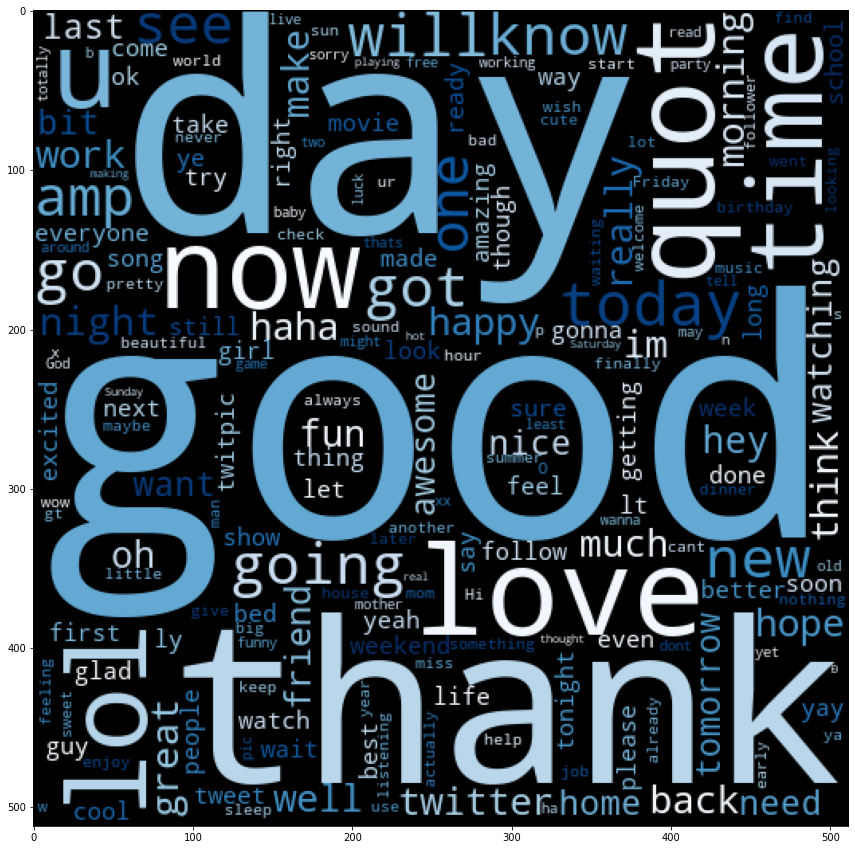

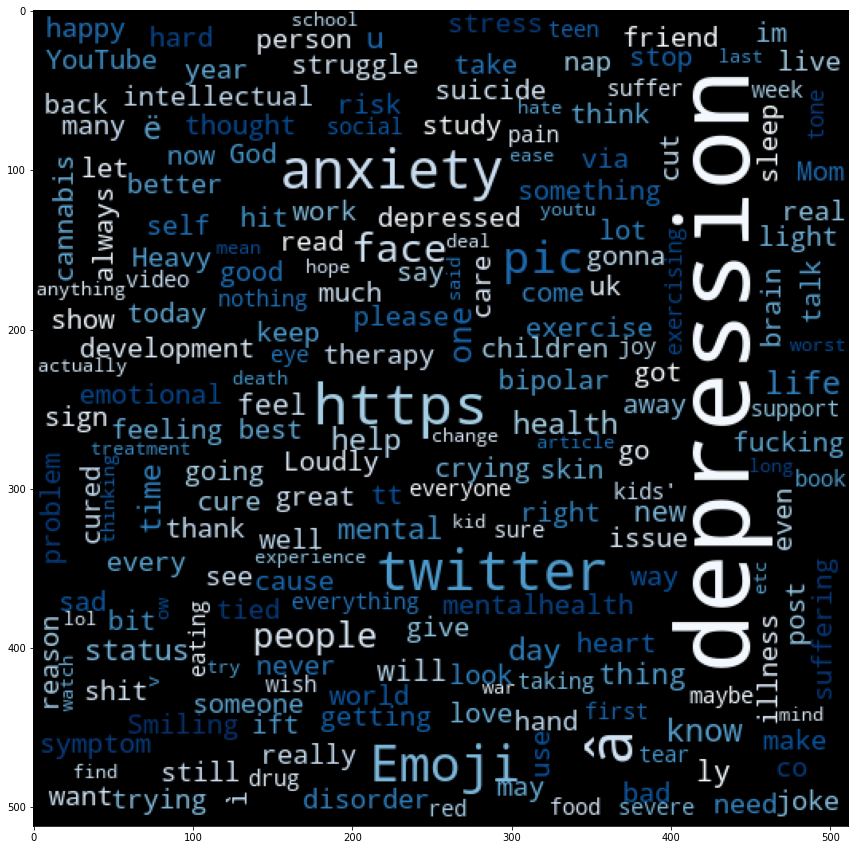

In [10]:
neutral_data = np.array(df[["message to examine"]][df["label (depression result)"] == 0])
print("length of neutral messages: ", len(neutral_data))
senti_data = np.array(df[["message to examine"]][df["label (depression result)"] == 1])
print("length of sentimental messages: ", len(senti_data))
wc_neutral = WordCloud(width = 512, height = 512, collocations=False, colormap="Blues").generate(' '.join(neutral_data.reshape(-1).tolist()))
wc_senti = WordCloud(width = 512, height = 512, collocations=False, colormap="Blues").generate(' '.join(senti_data.reshape(-1).tolist()))

plt.figure(figsize = (20, 15))
plt.imshow(wc_neutral)
plt.show()

plt.figure(figsize = (20, 15))
plt.imshow(wc_senti)
plt.show()

In [11]:
# print([r.split() for r in senti_data.reshape(-1)])

# Data Acquisition, Selection, Cleaning
Introduce the data here as well as any technical overview that's important that wasn't given in the introduction


In [12]:
X = [[0, 0, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0]]
y = [0, 1]
clf = MLPClassifier()

clf.fit(X, y)
clf.predict([[888, 999, 999, 444, 666, 777]])
clf.coefs_
clf.predict_proba([[0, 0, 1, 1, 0, 0]])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[0.80301152, 0.19698848]])

### Presteps before cleaning

1. validate NaN values
2. tokenize (split)

### Here are major issues with the current context that need to be cleaned:

1. too less content (1 or 2 words)
2. URLs
3. </> html labels
4. capitalizes
5. ï¿½C wierd notions 
6. misspellings and slangs ("missssssssss")

### Pipelines after cleaning the data

1. remove stopwords ()
2. Stemming (PorterStemmer)
3. convert to tensors (tf.keras.layers.TextVectorization)

In [13]:
class Message(object):
	def __init__(self, df=None, data=None) -> None:
		super().__init__()
		if df is not None:
			self.df = df
		if data is not None:
			self.data = data
	
	def presteps(self):
		self.df.dropna(inplace=True)
		self.data = np.array(df[["message to examine"]]).reshape(-1)
		self.label = np.array(df[["label (depression result)"]]).reshape(-1)
		self.neutral_data = np.array(df[["message to examine"]][df["label (depression result)"] == 0])
		self.senti_data = np.array(df[["message to examine"]][df["label (depression result)"] == 1])
	
	def clean(self, min_length=2, stop_words=True, stemming=True):
		for index in range(len(self.data)):
			self.data[index] = re.sub(r"<(\S*?)[^>]*>.*?|<.*? />", " ", self.data[index]) # html tags
			self.data[index] = re.sub(r"[a-zA-z]+://[^\s]*", " ", self.data[index]) # hyperlink
			self.data[index] = re.sub(r"http://([\w*]+\.)+[\w*]+(/[\w*./?%&=]*)?", " ", self.data[index]) # http
			self.data[index] = re.sub(r"https://([\w*]+\.)+[\w*]+(/[\w*./?%&=]*)?", " ", self.data[index]) # https
			self.data[index] = re.sub(r"\W+", " ", self.data[index]) # not letter, number, underline
			self.data[index] = self.data[index].lower() # lower
		# tokenize
		self._tokenize()
		for index in range(len(self.tokens)):
			if not min_length == 0:
				self.tokens[index] = [token for token in self.tokens[index] if len(token) >= min_length]
			if stop_words:
				sw = stopwords.words('english')
				self.tokens[index] = [token for token in self.tokens[index] if not token in sw]
			if stemming:
				stemmer = PorterStemmer()
				self.tokens[index] = [stemmer.stem(token) for token in self.tokens[index]]
		# back to string
		for index in range(len(self.tokens)):
			self.data[index] = " ".join(self.tokens[index])

			
	# Not used
	def _tokenize(self):
		self.tokens = self.data.copy()
		for index in range(len(self.data)):
			self.tokens[index] = self.data[index].split()
		return self.tokens

	@classmethod
	def flat(self, l): 
		for k in l: 
			if not isinstance(k, (list, tuple)): 
				yield k 
			else: 
				for v in Message.flat(k):
					yield v
	
	def get_vocab(self):
		self.vocab = list(set(Message.flat(self.tokens)))
		return self.vocab



msg = Message(df=df)
msg.presteps()
msg.clean(min_length=0, stop_words=False, stemming=False)
msg._tokenize()
msg.get_vocab()

['hawaiian',
 'wassuppp',
 'asda',
 'misikko',
 'blisters',
 'babimattivy',
 'shinee',
 'disease',
 'starpadilla',
 'trivia',
 'reached',
 'cheapest',
 '101',
 'finnish',
 'lolly',
 'juzzash',
 'oncoming',
 'african',
 'fil',
 'drug',
 'danieljuk',
 'joints',
 'mcfly',
 'liveasyoulove',
 'missed',
 'tubecosix',
 'dell',
 'ljsbaby',
 'q3enmbbqpa',
 'runnrgrl',
 'myke329',
 'paramount',
 'fade',
 '86',
 'piece',
 'nsfw',
 'cars',
 'chaela',
 'ox',
 'solitude',
 'lazy',
 'kayleighnicolee',
 'paper_hand',
 'restaurant',
 'push',
 'sugarhustler',
 'sicknotweaki',
 'coldplay',
 'awsome',
 'kk',
 'stayed',
 'flyddw',
 'amarita77',
 'tooooo',
 'simple',
 'themselves',
 'kanyewest',
 'told',
 'boobs',
 'marynabadenhors',
 'varunkumar',
 'playlist',
 'ahahaha',
 'tn',
 'celebrations',
 'camping',
 'p',
 'embarrassing',
 'quarters',
 '19hrs',
 'boost',
 'return',
 'daultrabeast',
 'bolster',
 'luck',
 'cities',
 'har',
 'kathylewisart',
 'weiner',
 'queen',
 'powerofpink',
 'terrific',
 'wee',
 '

next, let's convert the datset into train and validation sets, to measure how well the model perfroms through epochs. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(msg.data, msg.label, test_size=0.2, random_state=24)

next, let's build the model using keras.layers 

first layer should just be transforming strings into vectors and standarize those vectors. Then apply convariant layers and dropouts for learning and dropping for not overfitting too much. Finally, we dense the layers into a single scalar to indicate the posibility of being sentimental or not. 

In [15]:
# max_features = 50000
# embedding_dim = 128
# sequence_length = 500

model = tf.keras.models.Sequential()

vectorize_layer = tf.keras.layers.TextVectorization(vocabulary=msg.get_vocab(), ngrams=2)
# lstm = tf.keras.layers.LSTM(32)

model.add(tf.keras.Input(shape=(1, ), dtype=tf.string))
model.add(vectorize_layer)
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
model.add(tf.keras.layers.Embedding(max_features + 1, embedding_dim))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv1D(128, 1, activation="relu", strides=3))
model.add(tf.keras.layers.Conv1D(128, 3, activation="relu", strides=3))
model.add(tf.keras.layers.GlobalMaxPool1D())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 128)         6400128   
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 128)         16512     
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         49280     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                         

after we finish build up the configrations of the model. We train model by fit it over X_train, and test it over X_test. by setting verbose we can see the progress and summary of each epochs (that's so interesting just seeing the tick goes from progressbar 0 to 100%). The estimated time of one epoch is about 30 seconds so I set it to 10 times for the sake of running time. I have a plotting of a model of 30 epochs at the bottom for visulizing the progress (actually not so much progress) of this model.

In [16]:
epochs = 3

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=True)

Epoch 1/3
258/258 [==============================] - 31s 117ms/step - loss: 0.3920 - accuracy: 0.8428 - val_loss: 0.2523 - val_accuracy: 0.9103
Epoch 2/3
258/258 [==============================] - 33s 126ms/step - loss: 0.2195 - accuracy: 0.9233 - val_loss: 0.2359 - val_accuracy: 0.9176
Epoch 3/3
258/258 [==============================] - 29s 112ms/step - loss: 0.1411 - accuracy: 0.9549 - val_loss: 0.2732 - val_accuracy: 0.8997


In [17]:
print("model summary:")
print("train accuracy: ", history.history['accuracy'][0: 4], "*"*100, '\n',
"validiction accuracy:", history.history['val_accuracy'][0: 4], "*"*100, '\n',
"train loss:", history.history['loss'][0: 4], "*"*100, '\n',
"validiction loss:", history.history['val_loss'][0: 4])

model summary:
train accuracy:  [0.8428069353103638, 0.9232820272445679, 0.9549145698547363] **************************************************************************************************** 
 validiction accuracy: [0.91032475233078, 0.9175957441329956, 0.8996607065200806] **************************************************************************************************** 
 train loss: [0.3920130133628845, 0.21954713761806488, 0.14105424284934998] **************************************************************************************************** 
 validiction loss: [0.2522692084312439, 0.23588983714580536, 0.2732481360435486]


the above is the summary of the different scalars of the history, the next cell is just plotting out these quantifiers on matplotlib.

Text(0, 0.5, 'LOSS')

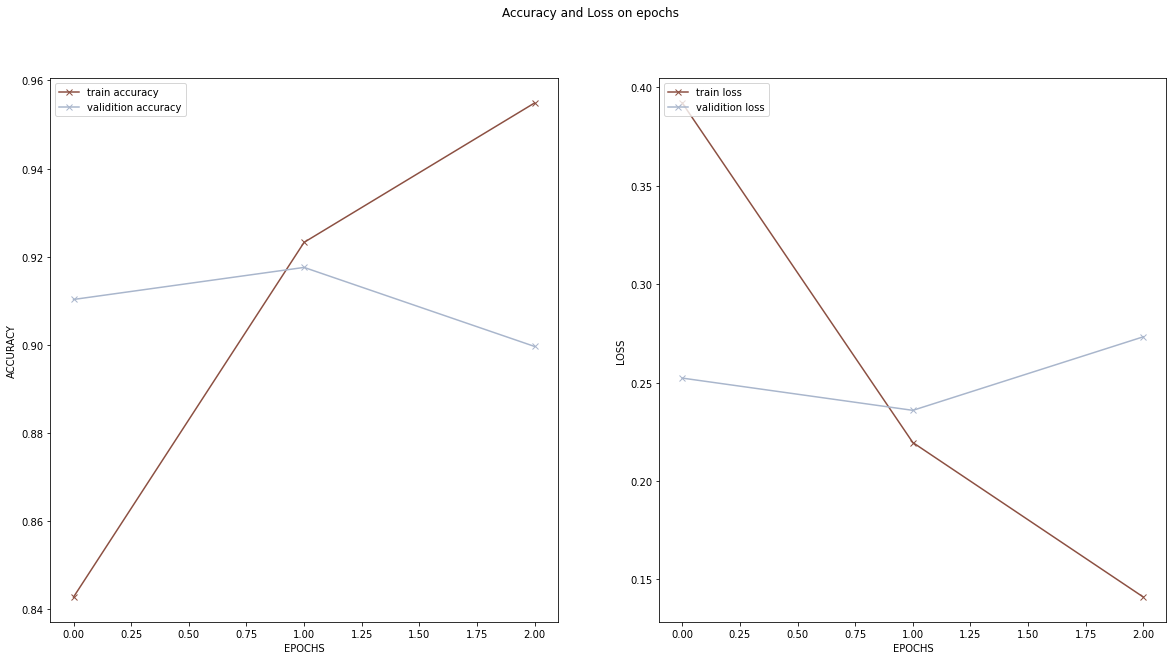

In [18]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
ax[0].plot(np.arange(epochs), history.history['accuracy'], 'x-', c='#8C5042', label='train accuracy')
ax[0].plot(np.arange(epochs), history.history['val_accuracy'], 'x-', c='#A9B6CC', label='validition accuracy')
ax[0].legend(loc='upper left')
ax[0].set_xlabel("EPOCHS")
ax[0].set_ylabel("ACCURACY")
fig.suptitle('Accuracy and Loss on epochs')

ax[1].plot(np.arange(epochs), history.history['loss'], 'x-', c='#8C5042', label='train loss')
ax[1].plot(np.arange(epochs), history.history['val_loss'], 'x-', c='#A9B6CC', label='validition loss')
ax[1].legend(loc='upper left')
ax[1].set_xlabel("EPOCHS")
ax[1].set_ylabel("LOSS")

This is the running result of a 30-epochs model training history:

![a.png](https://raw.githubusercontent.com/zhu-jun-ting/INFO-490-MH2/main/final_project/aaa.png)

next, let's predict our query tweets. because of the size of the corpus, it is hard to fit all possible english words but it seems to do a good job on some inputs:

as a reminder, the larger means the more sentiment it is.

In [19]:
"'nite twitterville workout in the am': {:.9f}".format(model.predict(x=["nite twitterville workout in the am"])[0][0])

def predict(corpus): 
	result = []
	msg = Message(data=corpus)
	msg.clean(min_length=0, stop_words=False, stemming=False)
	for query in msg.data:
		result.append("{}: {:.9f}".format(query, model.predict(x=[query])[0][0]))
	return result

corpus = [
	"it's a nice day", 
	"dont mistake a bad day with depression", 
	"I am overwhelmed by the courseload of INFO 490", 
	"I hate linear algebra and number theory",
	"and anxiety are the worst"
]

predict(corpus)

['it s a nice day: 0.045637071',
 'dont mistake a bad day with depression: 0.999981940',
 'i am overwhelmed by the courseload of info 490: 0.782151461',
 'i hate linear algebra and number theory: 0.973856688',
 'and anxiety are the worst: 0.415525526']

next, you can enter your trail query to ask the model its possiblity of being sentimental:

In [22]:
@widget.interact(query=widget.Text("it is a sad day", continuous_update=True))
def _show_result(query):
	p = model.predict(x=[query])[0][0]
	bar = widget.FloatProgress(
        value=p,
        min=0,
        max=1,
        description='P(sentimental)',
        bar_style='', # 'success', 'info', 'warning', 'danger' or ''
        style={'bar_color': 'maroon'},
        orientation='horizontal'
	)
	return bar

interactive(children=(Text(value='it is a sad day', description='query'), Output()), _dom_classes=('widget-int…

# Data Analysis

# Summary


---
# Submission Guidelines (keep this section here)
---


When you are ready to submit your project, part of the submission process will be to register your notebook for reviewing.  

For each milestone, you will submit an updated version of your project notebook (this notebook) with that milestone’s requirements. Your project notebook ID and URL should be the same.

You will also receive the links and instructions to do the peer reviews.

**Submission for Milestone0:**
1. Save a copy of this notebook in your Google drive
3. Share the Noetbook and place the Notebook ID in the first code cell
4. Download as "DMAP_FA21_Final_Project_MS0.ipynb"
5. Submit this in Moodle
